<a href="https://colab.research.google.com/github/fedyaevys/test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab3_PCA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3

## Задание
Решите пожалуйста следующую задачу.

1. Примените методы снижения размерности (до двумерного представления
n_components=2) перечисленные ниже для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view). Здесь - метка (учитель) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- PCA
- LDA
- TruncatedSVD
- Kernel PCA (перебрав все ядерные функции - ('linear', 'poly', 'rbf', sigmoid',
'cosine', 'precomputed')

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 53.5MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Метод PCA

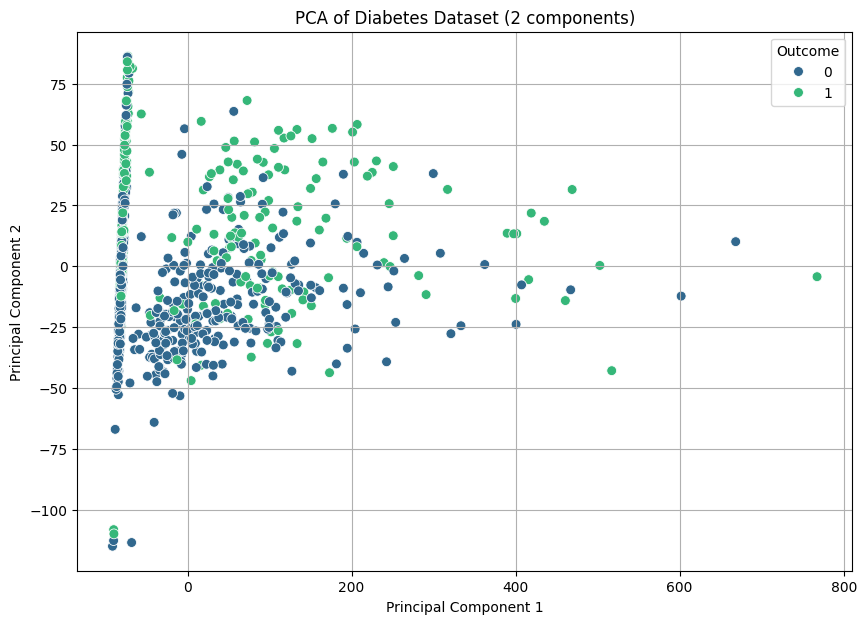

In [ ]:
from sklearn.decomposition import PCA

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Initialize PCA with n_components=2
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Outcome'] = y

# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Outcome', data=pca_df, palette='viridis', s=50)
plt.title('PCA of Diabetes Dataset (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## Метод LDA

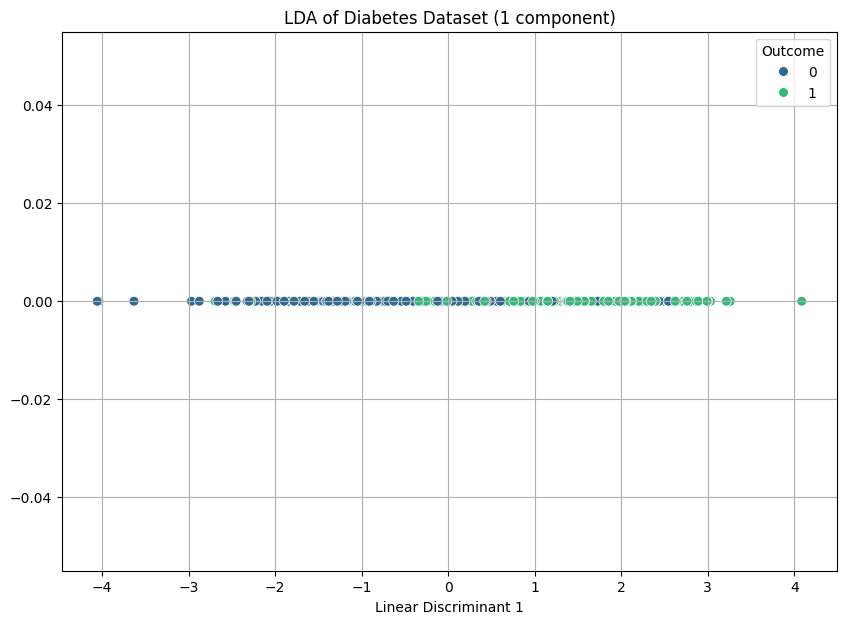

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize LDA with n_components=1 since LDA can have at most n_classes - 1 components
# For a binary classification problem (2 classes), n_components is 1.
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit LDA to the data and transform it
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for the LDA results
lda_df = pd.DataFrame(data=X_lda, columns=['LDA1'])
lda_df['Outcome'] = y

# Plot the LDA results. Since we only have 1 component, we can use a histogram or a scatter plot with a dummy second dimension
plt.figure(figsize=(10, 7))
sns.scatterplot(x='LDA1', y=[0] * len(lda_df), hue='Outcome', data=lda_df, palette='viridis', s=50)
plt.title('LDA of Diabetes Dataset (1 component)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('')
plt.grid(True)
plt.show()

## Метод TruncatedSVD

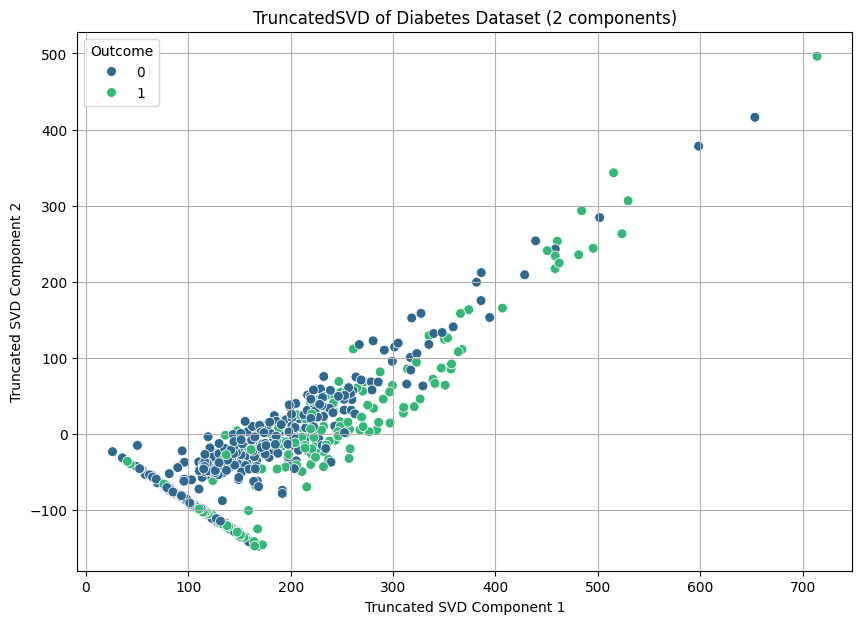

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Initialize TruncatedSVD with n_components=2
svd = TruncatedSVD(n_components=2)

# Fit TruncatedSVD to the data and transform it
X_svd = svd.fit_transform(X)

# Create a DataFrame for the TruncatedSVD results
svd_df = pd.DataFrame(data=X_svd, columns=['SVD1', 'SVD2'])
svd_df['Outcome'] = y

# Plot the TruncatedSVD results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='SVD1', y='SVD2', hue='Outcome', data=svd_df, palette='viridis', s=50)
plt.title('TruncatedSVD of Diabetes Dataset (2 components)')
plt.xlabel('Truncated SVD Component 1')
plt.ylabel('Truncated SVD Component 2')
plt.grid(True)
plt.show()

## Метод Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Ядерная функция `linear`

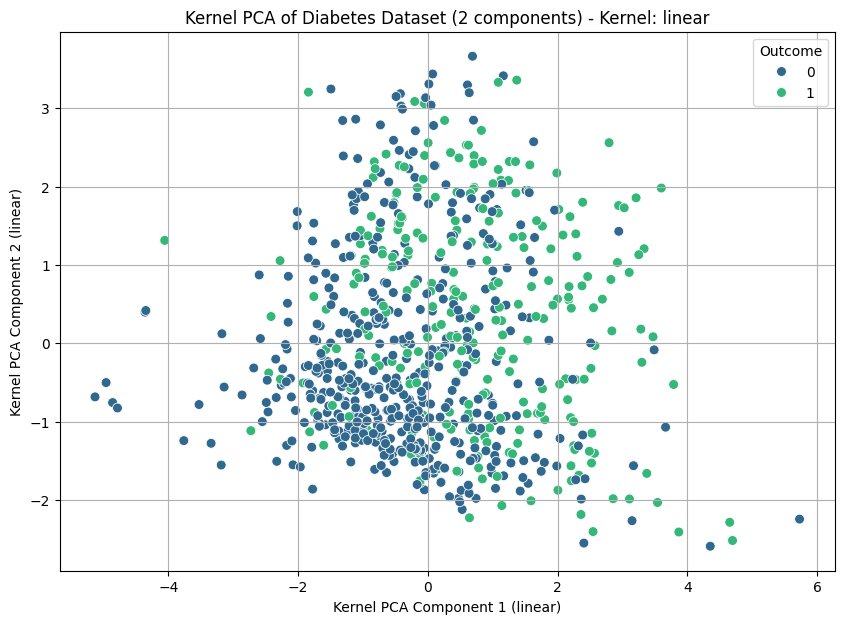

In [ ]:
# Initialize KernelPCA with n_components=2 and the 'linear' kernel
kpca_linear = KernelPCA(n_components=2, kernel='linear', eigen_solver='dense')

# Fit KernelPCA to the scaled data and transform it
X_kpca_linear = kpca_linear.fit_transform(X_scaled)

# Create a DataFrame for the KernelPCA results
kpca_linear_df = pd.DataFrame(data=X_kpca_linear, columns=['KernelPCA1_linear', 'KernelPCA2_linear'])
kpca_linear_df['Outcome'] = y

# Plot the KernelPCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='KernelPCA1_linear', y='KernelPCA2_linear', hue='Outcome', data=kpca_linear_df, palette='viridis', s=50)
plt.title('Kernel PCA of Diabetes Dataset (2 components) - Kernel: linear')
plt.xlabel('Kernel PCA Component 1 (linear)')
plt.ylabel('Kernel PCA Component 2 (linear)')
plt.grid(True)
plt.show()

### Ядерная функция `poly`

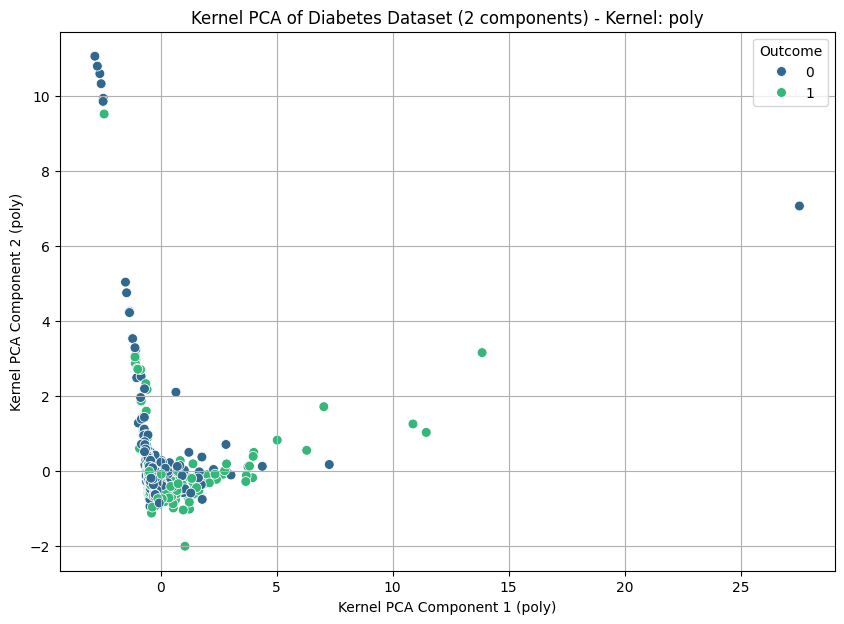

In [ ]:
# Initialize KernelPCA with n_components=2 and the 'poly' kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', eigen_solver='dense')

# Fit KernelPCA to the scaled data and transform it
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

# Create a DataFrame for the KernelPCA results
kpca_poly_df = pd.DataFrame(data=X_kpca_poly, columns=['KernelPCA1_poly', 'KernelPCA2_poly'])
kpca_poly_df['Outcome'] = y

# Plot the KernelPCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='KernelPCA1_poly', y='KernelPCA2_poly', hue='Outcome', data=kpca_poly_df, palette='viridis', s=50)
plt.title('Kernel PCA of Diabetes Dataset (2 components) - Kernel: poly')
plt.xlabel('Kernel PCA Component 1 (poly)')
plt.ylabel('Kernel PCA Component 2 (poly)')
plt.grid(True)
plt.show()

### Ядерная функция `rbf`

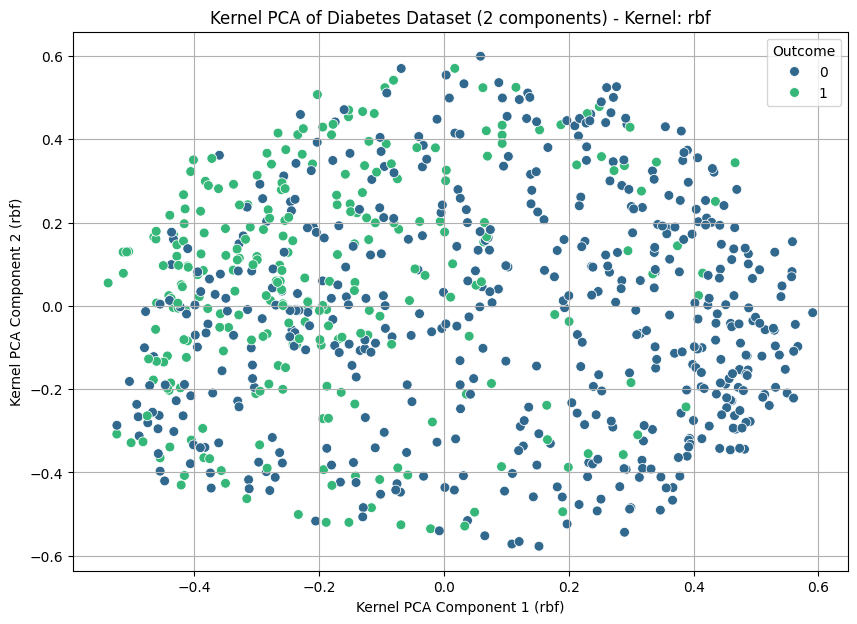

In [ ]:
# Initialize KernelPCA with n_components=2 and the 'rbf' kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', eigen_solver='dense')

# Fit KernelPCA to the scaled data and transform it
X_kpca_rbf = kpca_rbf.fit_transform(X_scaled)

# Create a DataFrame for the KernelPCA results
kpca_rbf_df = pd.DataFrame(data=X_kpca_rbf, columns=['KernelPCA1_rbf', 'KernelPCA2_rbf'])
kpca_rbf_df['Outcome'] = y

# Plot the KernelPCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='KernelPCA1_rbf', y='KernelPCA2_rbf', hue='Outcome', data=kpca_rbf_df, palette='viridis', s=50)
plt.title('Kernel PCA of Diabetes Dataset (2 components) - Kernel: rbf')
plt.xlabel('Kernel PCA Component 1 (rbf)')
plt.ylabel('Kernel PCA Component 2 (rbf)')
plt.grid(True)
plt.show()

### Ядерная функция `sigmoid`

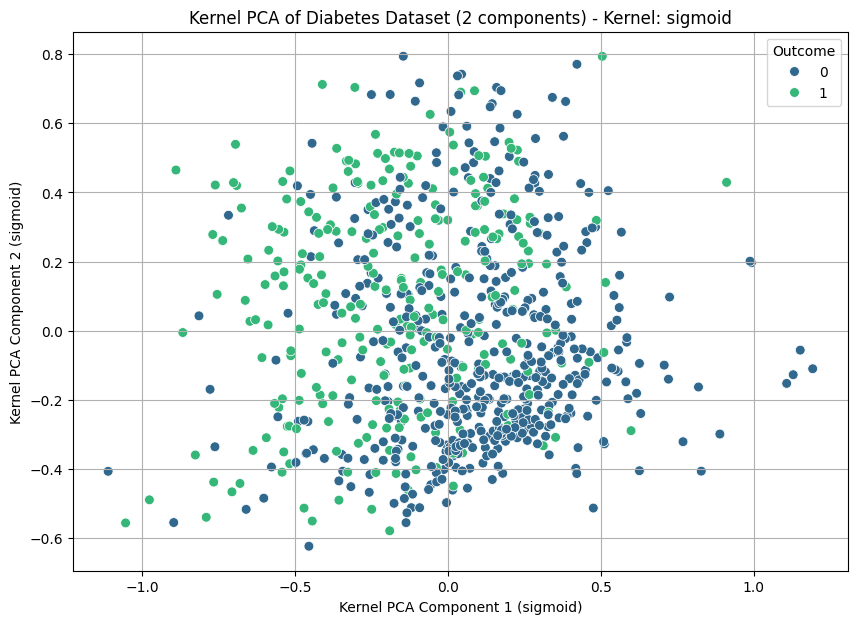

In [ ]:
# Initialize KernelPCA with n_components=2 and the 'sigmoid' kernel
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', eigen_solver='dense')

# Fit KernelPCA to the scaled data and transform it
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X_scaled)

# Create a DataFrame for the KernelPCA results
kpca_sigmoid_df = pd.DataFrame(data=X_kpca_sigmoid, columns=['KernelPCA1_sigmoid', 'KernelPCA2_sigmoid'])
kpca_sigmoid_df['Outcome'] = y

# Plot the KernelPCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='KernelPCA1_sigmoid', y='KernelPCA2_sigmoid', hue='Outcome', data=kpca_sigmoid_df, palette='viridis', s=50)
plt.title('Kernel PCA of Diabetes Dataset (2 components) - Kernel: sigmoid')
plt.xlabel('Kernel PCA Component 1 (sigmoid)')
plt.ylabel('Kernel PCA Component 2 (sigmoid)')
plt.grid(True)
plt.show()

### Ядерная функция `cosine`

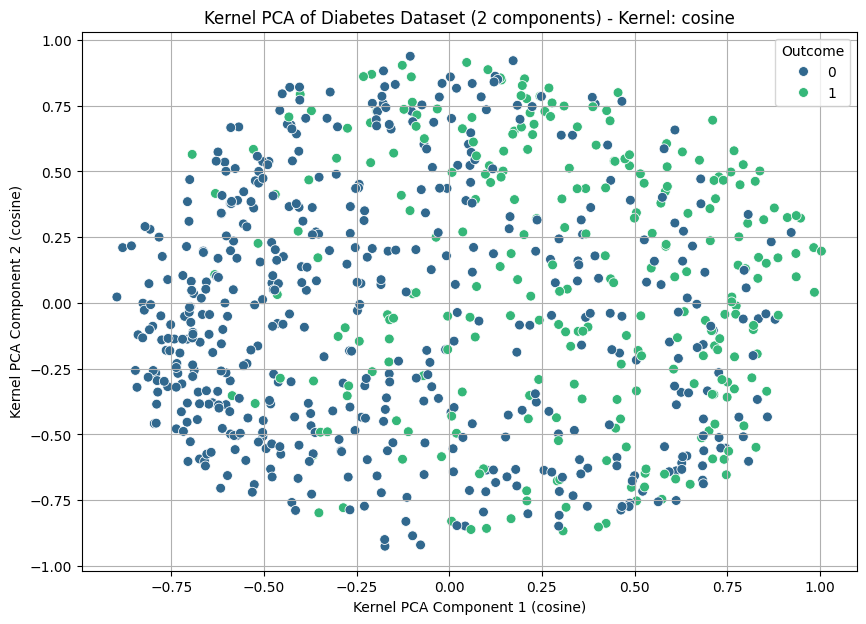

In [ ]:
# Initialize KernelPCA with n_components=2 and the 'cosine' kernel
kpca_cosine = KernelPCA(n_components=2, kernel='cosine', eigen_solver='dense')

# Fit KernelPCA to the scaled data and transform it
X_kpca_cosine = kpca_cosine.fit_transform(X_scaled)

# Create a DataFrame for the KernelPCA results
kpca_cosine_df = pd.DataFrame(data=X_kpca_cosine, columns=['KernelPCA1_cosine', 'KernelPCA2_cosine'])
kpca_cosine_df['Outcome'] = y

# Plot the KernelPCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='KernelPCA1_cosine', y='KernelPCA2_cosine', hue='Outcome', data=kpca_cosine_df, palette='viridis', s=50)
plt.title('Kernel PCA of Diabetes Dataset (2 components) - Kernel: cosine')
plt.xlabel('Kernel PCA Component 1 (cosine)')
plt.ylabel('Kernel PCA Component 2 (cosine)')
plt.grid(True)
plt.show()

### Ядерная функция `precomputed`

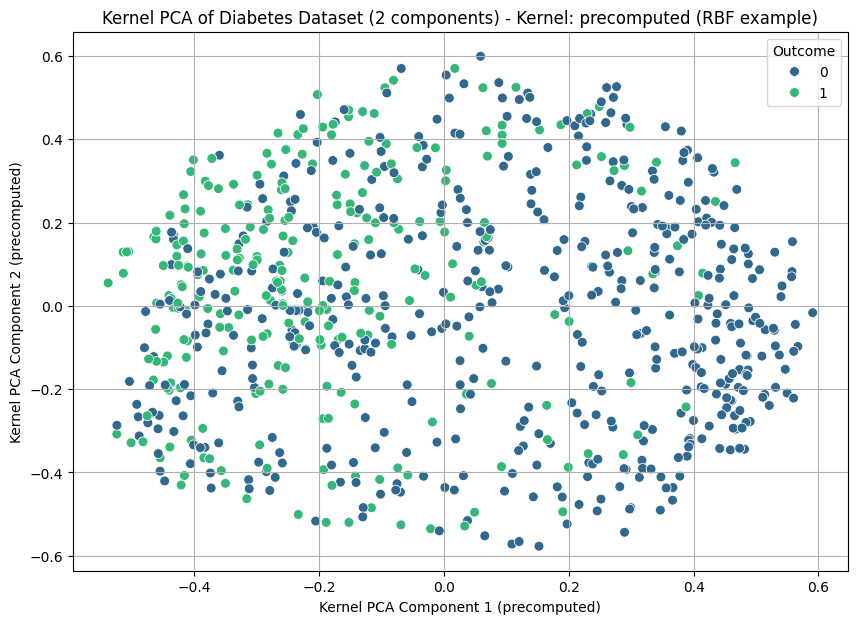

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

# Compute the kernel matrix (using rbf kernel as an example for precomputed)
# You can choose a different kernel function if needed
gamma = 1.0 / X_scaled.shape[1]  # Example gamma value
precomputed_kernel_matrix = rbf_kernel(X_scaled, gamma=gamma)

# Initialize KernelPCA with n_components=2 and the 'precomputed' kernel
kpca_precomputed = KernelPCA(n_components=2, kernel='precomputed', eigen_solver='dense')

# Fit KernelPCA to the precomputed kernel matrix and transform it
X_kpca_precomputed = kpca_precomputed.fit_transform(precomputed_kernel_matrix)

# Create a DataFrame for the KernelPCA results
kpca_precomputed_df = pd.DataFrame(data=X_kpca_precomputed, columns=['KernelPCA1_precomputed', 'KernelPCA2_precomputed'])
kpca_precomputed_df['Outcome'] = y

# Plot the KernelPCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='KernelPCA1_precomputed', y='KernelPCA2_precomputed', hue='Outcome', data=kpca_precomputed_df, palette='viridis', s=50)
plt.title('Kernel PCA of Diabetes Dataset (2 components) - Kernel: precomputed (RBF example)')
plt.xlabel('Kernel PCA Component 1 (precomputed)')
plt.ylabel('Kernel PCA Component 2 (precomputed)')
plt.grid(True)
plt.show()